# Практическая работа № 6

#### Импортирование необходимых библиотек

In [1]:
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

#### Функция отрисовки 3д графика

In [2]:
def draw_scatter(x,y,z,color):
    fig = go.Figure(data=[go.Scatter3d(x=x, 
                                    y=y, 
                                    z=z, 
                                    mode='markers',
                                    marker_color=color, marker_size=4)])
    fig.show()

### Задание 1

In [3]:
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = data.columns.astype(str)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Задание 2

In [4]:
models = []
score1 = []
score2 = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++', n_init='auto').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

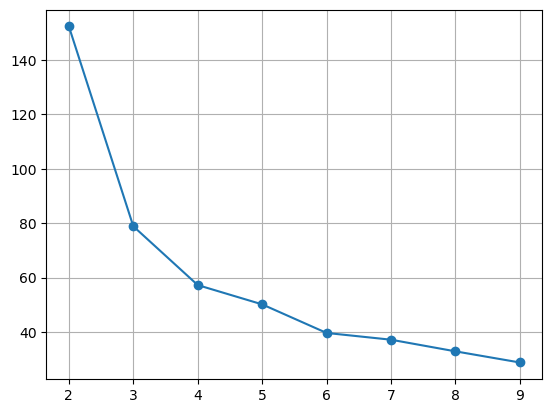

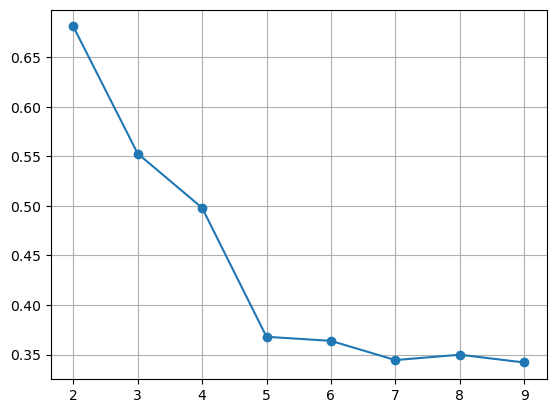

In [5]:

# Построение графика правила локтя
plt.grid()
plt.plot(range(2, 10), score1, marker='o')
plt.show()

# Построение графика коэффициента силуэта
plt.grid()
plt.plot(range(2, 10), score2, marker='o')
plt.show()

In [6]:
model1 = KMeans(n_clusters=4, random_state=123, init='k-means++', n_init='auto')
model1.fit(data)

print("Список координат центров кластеров в пространстве: \n",model1.cluster_centers_)

labels = model1.labels_
data['Claster'] = labels

draw_scatter(data['0'], data['1'], data['2'], data['Claster'])

Список координат центров кластеров в пространстве: 
 [[6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]
 [6.2525     2.855      4.815      1.625     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]


d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Задание 3

In [7]:
model2 = AgglomerativeClustering(4, compute_distances=True)
model2.fit(data)

labels = model2.labels_
data['Claster'] = labels

draw_scatter(data['0'], data['1'], data['2'],data['Claster'])

### Задание 4

In [8]:
model3 = DBSCAN(eps=0.3, min_samples=5).fit(data)

labels = model3.labels_
data['Claster'] = labels

draw_scatter(data['0'], data['1'], data['2'],data['Claster'])

### Задание 5

In [9]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(data)

draw_scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], color=labels)
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels)